#### 1. Loading required Libraries

In [470]:
import numpy as np               # Linear Algebra
import pandas as pd              # Data Handling
import seaborn as sns            # Visualization
import matplotlib.pyplot as plt  # Visualization
from datetime import date        # Use Year
import warnings                  # For warnings
warnings.filterwarnings('ignore')

#### 2. Importing dataset into 'cars' dataframe

In [471]:
cars = pd.read_csv("../datasets/Cars24.csv")
cars.head()

,Title,cvakb,cvakb1,bvr0c,bvr0c2,bvr0c3,_7udzz,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2020 KIA SELTOS,GTX + AT PETROL Automatic,Automatic,"8,241 km",1st Owner,Petrol,"?18,95,199",NaN,NaN,NaN,NaN,NaN,NaN
1,2020 Maruti Swift,LXI Manual,Manual,"10,568 km",1st Owner,Petrol,"?5,92,499",NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Maruti Swift,LXI Manual,Manual,"27,659 km",1st Owner,Petrol,"?5,33,399",NaN,NaN,NaN,NaN,NaN,NaN
3,2020 KIA SELTOS,HTX 1.5 PETROL MT Manual,Manual,"32,799 km",1st Owner,Petrol,"?13,83,099",NaN,NaN,NaN,NaN,NaN,NaN
4,2014 Mercedes Benz C Class,C 200 AVANTGARDE Automatic,Automatic,"37,531 km",1st Owner,Petrol,"?20,33,499",NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Feature Engineering

In [472]:
# To Perform Regex Operation
import re 

# Will return string containing numbers
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return "".join(num)

# For Feature Engineering
def feature_engineering(cars):
    # First seven columns are relevant
    cars = cars.iloc[:,:7]

    # Giving Proper names to features
    cars.rename(columns = {'Title':'Name', 'cvakb':'Variant', 'cvakb1':'Transmission', 'bvr0c':'km_driven', 'bvr0c2':'Owner_Type', 'bvr0c3':'Fuel', '_7udzz':'Price'}, inplace = True)

    # Extracting only numbers
    cars["Price"] = cars["Price"].apply(lambda x: find_number(x))

    # Extracting year of purchase from Name
    cars["Year_Purchased"] = cars["Name"].str.split().str.slice(start=0,stop=1).str.join(' ')

    # Extracting name excluding year of purchase
    cars["Name"] = cars["Name"].str.split().str.slice(start=1,stop=3).str.join(' ')

    # Removing "km"
    cars["km_driven"] = cars["km_driven"].str.split().str.slice(start=0,stop=1).str.join(' ')

    # Extracting only numbers
    cars["km_driven"] = cars["km_driven"].apply(lambda x: find_number(x))

    # Removing Transmission type from the end of Variant
    cars["Variant"] = cars["Variant"].str.rsplit(' ',1).str[0]

    # Converting features to int
    cars = cars.astype({"km_driven":"int","Price":"int", "Year_Purchased":"int"})

    # Deriving Age of Vehical from Year of Purchase
    cars["Age"] = date.today().year - cars["Year_Purchased"]
    cars.drop(['Year_Purchased'], axis=1, inplace=True)

    return cars

In [473]:
cars = feature_engineering(cars)

In [474]:
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,2
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,2
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,3
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,2
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,8


#### 4. Description of Dataset

##### 4.1 Shape of Dataset

In [475]:
shape = cars.shape
print(f"There are \033[1m {shape[0]} rows\patterns \033[0m and \033[1m{shape[1]} features\033[0m.")

There are  656 rows\patterns  and 8 features.


##### 4.2 info

In [476]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          656 non-null    object
 1   Variant       656 non-null    object
 2   Transmission  632 non-null    object
 3   km_driven     656 non-null    int64 
 4   Owner_Type    656 non-null    object
 5   Fuel          656 non-null    object
 6   Price         656 non-null    int64 
 7   Age           656 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 41.1+ KB


##### 4.3 Missing Values for features

In [477]:
[[features,cars[features].isnull().sum()] for features in cars.columns if cars[features].isnull().sum()>0]

[['Transmission', 24]]

##### 4.4 Heat Map for Missing Values

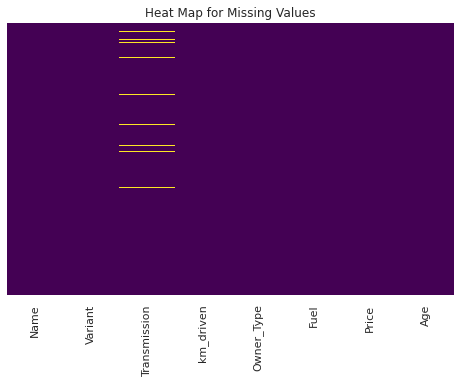

In [478]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(cars.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

##### 4.5 Dropping NA values

In [479]:
cars.dropna(inplace=True)

Approximately, **3% values are Na**. Therefore, to simplify things, we dropped them.

#### 5. Exploratory Data Analysis

##### 5.1.1. Type of Owner and Number of Cars

In [480]:
cars['Owner_Type'].value_counts()

1st Owner    504
2nd Owner    123
3rd Owner      5
Name: Owner_Type, dtype: int64

##### 5.1.2. Countplot Owner Type Vs Number of Cars

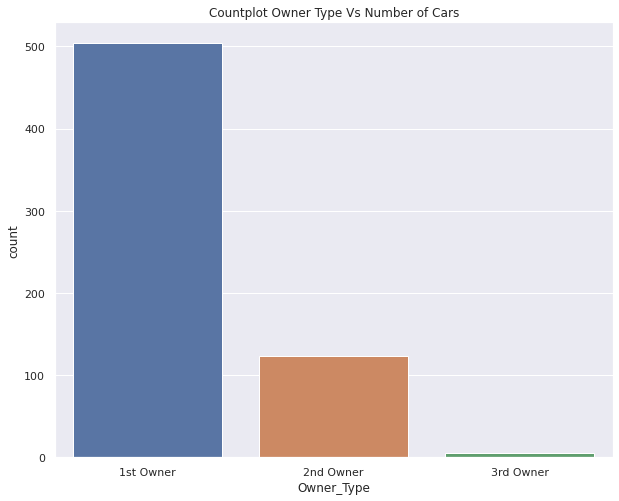

In [481]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Countplot Owner Type Vs Number of Cars")
sns.countplot(x ='Owner_Type', data = cars)
plt.show()

**Observation**

**First Owned Cars** are **highest among all**.

##### 5.1.4. Pie Chart Type of Owner Vs Number of cars.

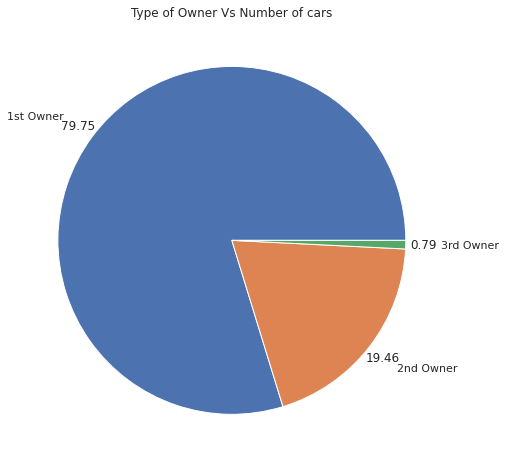

In [482]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Type of Owner Vs Number of cars")
plt.pie(cars['Owner_Type'].value_counts(),labels=cars['Owner_Type'].unique(),pctdistance=1.1, labeldistance=1.2,autopct='%.2f')
plt.show()

**Observation**

1. **79.75 %** of cars are **First Owned**.
2. **19.46 %** of cars are **Second Owned**.
3. **0.79 %** of cars are **Third Owned**.

##### 5.2. Barplot Owner Type Vs Selling Price

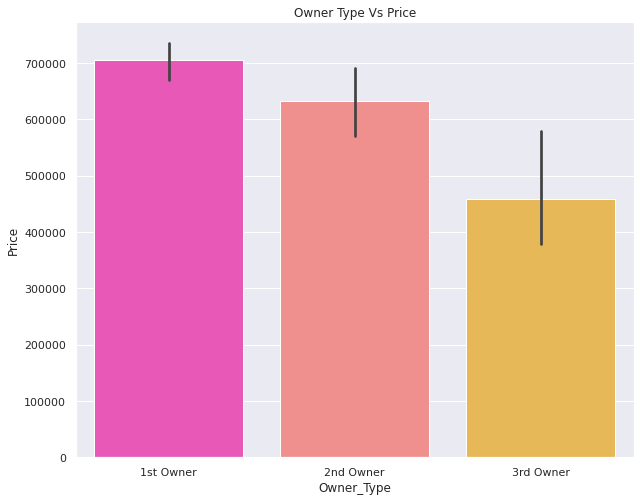

In [483]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Owner Type Vs Price")
sns.barplot(x='Owner_Type',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

**First Owner cars** have **high average selling price**. 

As **number of owners** increases the **selling price** of car **decreases**.

##### 5.3.1. Automatic Vs Manual

In [484]:
cars['Transmission'].unique()

array(['Automatic', 'Manual', 'AUTOMATIC'], dtype=object)

In [485]:
cars['Transmission'] = np.where(cars['Transmission'] == 'AUTOMATIC', 'Automatic', cars['Transmission'])

In [486]:
cars['Transmission'].value_counts()

Manual       515
Automatic    117
Name: Transmission, dtype: int64

##### 5.3.2. Countplot Transmission Vs Number of Cars

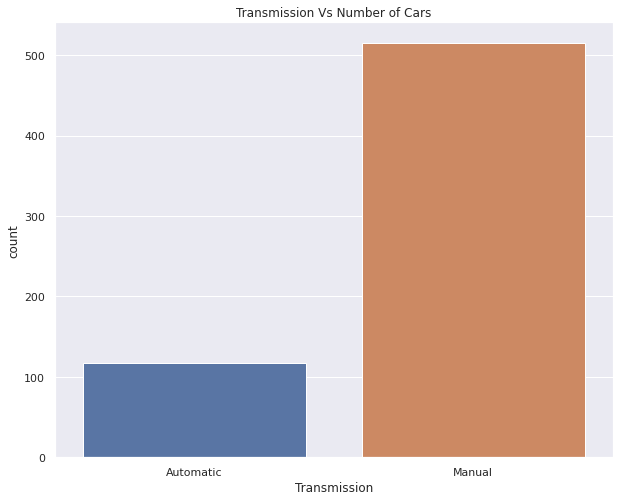

In [487]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Number of Cars")
sns.countplot(x ='Transmission', data = cars)
plt.show()

**Observation**

Most of the cars are **Manual**.

##### 5.4. Barplot Transmission Vs Selling Price

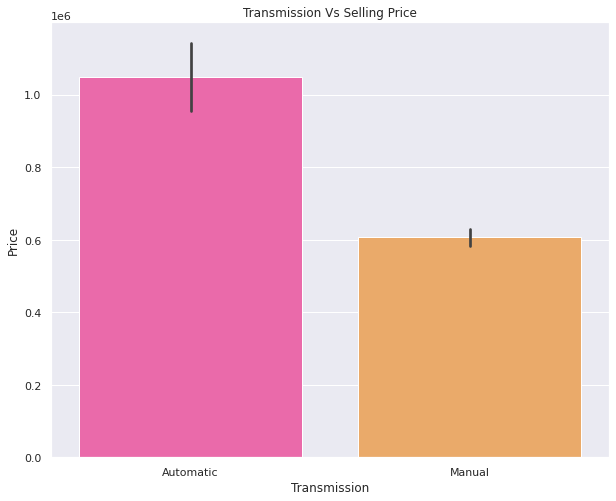

In [488]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Transmission Vs Selling Price")
sns.barplot(x='Transmission',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

Cars having **Automatic Transmission have high selling price**.

##### 5.5. Countplot Fuel Vs Number of Cars

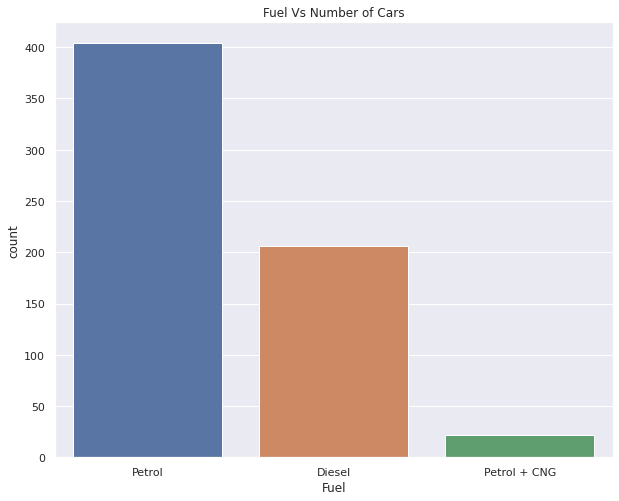

In [489]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Number of Cars")
sns.countplot(x ='Fuel', data = cars)
plt.show()

**Observation**

Most of the cars are **Petrol**.

##### 5.6. Barplot Fuel Vs Selling Price

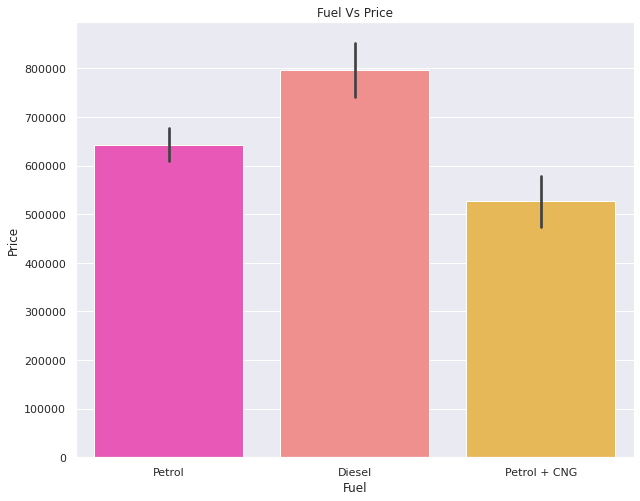

In [490]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Fuel Vs Price")
sns.barplot(x='Fuel',y='Price',data=cars,palette='spring')
plt.show()

**Observation**

**Diesel cars** have **high average selling price**.

##### 5.7. Age Vs Price

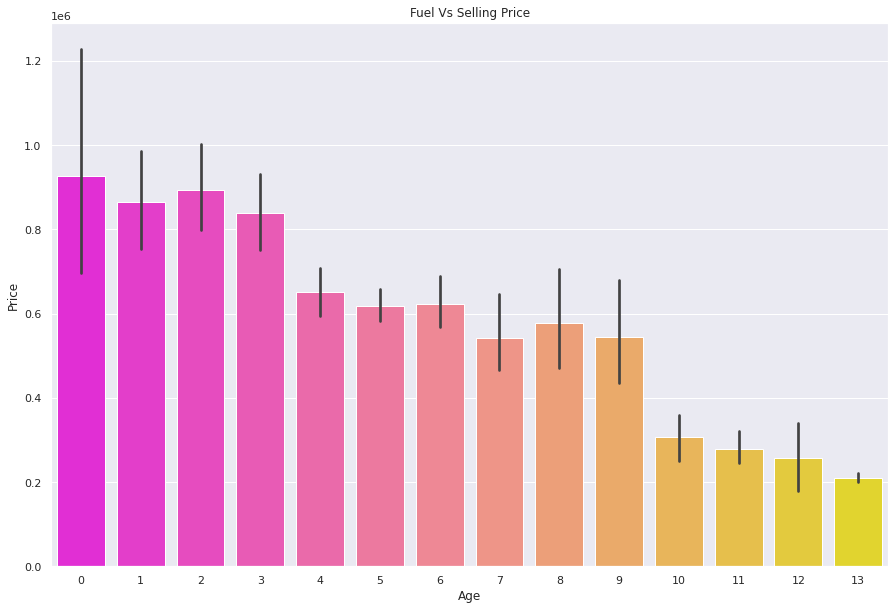

In [491]:
fig = sns.set(rc={'figure.figsize': (15, 10)})
plt.title("Fuel Vs Selling Price")
sns.barplot(x ='Age', y="Price", data = cars ,palette='spring')
plt.show()

**Observation**

As the age of Vehical increases, Price Decreases.

#### 6. Model Fitting

In [492]:
# For Further Use, saving the dataframe to csv

cars.to_csv("../datasets/clean_car.csv")

##### 6.0 Outliers

Before, fitting any model we need to analyse outliers in the dataset.

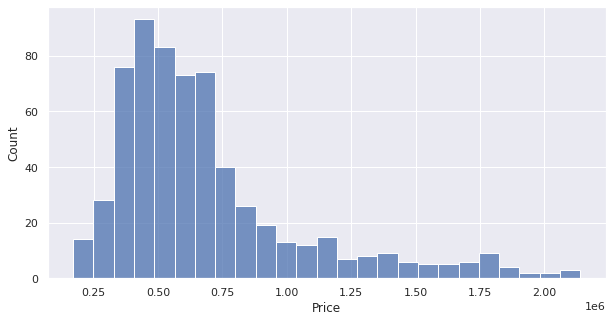

In [493]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
sns.histplot(cars['Price'])
# plt.hist(cars['Price'], bins=20, rwidth=0.8)
plt.show()

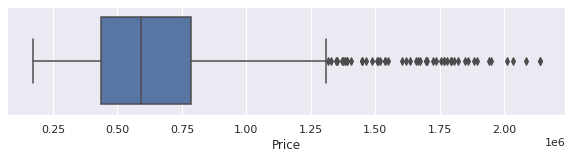

In [494]:
fig = sns.set(rc={'figure.figsize': (10, 2)})
sns.boxplot(cars['Price'])
plt.show()

**Observation**

As we can see, there are more than one outliers in the feature **Price**.

In [495]:
cars['zscore'] = (cars['Price'] - cars['Price'].mean()) / cars['Price'].std()
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,2,3.225112
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,2,-0.257488
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,3,-0.415484
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,2,1.856079
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,8,3.594840


In [496]:
outliers = cars[(cars['zscore'] < -3) | (cars['zscore'] > 3)]
outliers.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
0,KIA SELTOS,GTX + AT PETROL,Automatic,8241,1st Owner,Petrol,1895199,2,3.225112
4,Mercedes Benz,C 200 AVANTGARDE,Automatic,37531,1st Owner,Petrol,2033499,8,3.594840
34,MG HECTOR,SHARP HYBRID PETROL,Manual,12185,2nd Owner,Petrol,1848299,2,3.099731
37,Jeep Compass,1.4 LONGITUDE (O) AT,Automatic,23327,1st Owner,Petrol,2012799,3,3.539501
38,Jeep Compass,2.0 LIMITED,Manual,46860,1st Owner,Diesel,1941699,3,3.349424


In [497]:
outliers.shape

(12, 9)

In [498]:
cars = cars[(cars['zscore'] > -3) & (cars['zscore'] < 3)]
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age,zscore
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,2,-0.257488
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,3,-0.415484
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,2,1.856079
6,Hyundai i10,ERA 1.1 IRDE,Manual,37928,1st Owner,Petrol,271699,9,-1.115106
7,Honda City,VX MT PETROL,Manual,61168,2nd Owner,Petrol,658499,8,-0.081046


In [499]:
del cars["zscore"]

##### 6.1. Splitting Data into X and y

In [500]:
X = cars.drop(columns =['Price'])
y = cars['Price']

##### 6.2. Importing libraries for model fitting

In [501]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##### 6.3. Pipeline

##### 6.3.1. One Hot Encoding

In [502]:
ohe = OneHotEncoder()
ohe.fit(X[['Name','Variant','Transmission','Owner_Type','Fuel']])

OneHotEncoder()

In [503]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),['Name','Variant','Transmission','Owner_Type','Fuel']),
    remainder='passthrough'
)

##### 6.3.2. Standard Scaler

In [504]:
scaler = StandardScaler(with_mean=False)

##### 6.3.3. Regression Models

In [505]:
# Linear Regression
lr = LinearRegression()

# Alpha values
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

# Ridge and Lasso
ridge = Ridge(alpha=0.001)
lasso = Lasso(alpha=0.001)

**Hyper Parameters**

1. fit_intercept : bool, default=True
If set to False, no intercept will be used in calculations.

2. normalize : bool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 

3. copy_X : bool, default=True
If True, X will be copied; else, it may be overwritten.

4. n_jobs : int, default=None
The number of jobs to use for the computation. 

5. positive : bool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

##### 6.3.4. Pipeline Structure

In [506]:
pipe = make_pipeline(column_trans, scaler, lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi Q3', 'Audi Q5', 'BMW 5', 'BMW X1', 'BMW X3',
       'Datsun Redi', 'Ford Ecosport', 'Ford Figo', 'Honda Amaze',
       'Honda Brio', 'Honda City', 'Honda Civic', 'Honda Jazz',
       'Honda WR-V', 'Hyundai Creta', 'Hyundai Elite', 'Hyundai Eon',
       '...
       'ZX CVT PETROL', 'ZXI', 'ZXI +', 'ZXI 1.2', 'ZXI AMT',
       'ZXI OPT AMT', 'ZXI+'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG'], dtype=object)]),
                                                  ['Name', 'Variant',
                                                   'Transmission', 'Owner_Type',
                                                   'Fuel'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

#### 7. Functions

##### 7.1 For converting big values into readable form

In [507]:
def format_float(num):
    return np.format_float_positional(round(num,2), trim='-')

##### 7.2. Returns Dataframe consisting all errors

In [508]:
def metrics(y_test, y_pred, X_train):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Number of rows
    n = len(X_train)

    # Number of Independent Features
    k = len(X_train.columns)

    adj_r2 = 1- ((1-r2) * (n-1)/(n-k-1))

    dict_ = {
        "MAE": [format_float(mae)],
        "MSE": [format_float(mse)],
        "RMSE": [format_float(rmse)],
        "R2": [(r2)],
        "Adjusted-R2": [(adj_r2)]
    }

    results = pd.DataFrame(dict_)
    results.index = ["Values"]

    return results

##### 7.3. For Training model

In [509]:
def train_model(X, y, transformer, scaler, model):
    pipe = make_pipeline(transformer, scaler, model)
    X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(x_test)
    
    return metrics(y_test, y_pred, X_train), pipe

#### 8. Train

In [510]:
metrics_df, lr = train_model(X, y, column_trans, scaler, lr)
metrics_df

,MAE,MSE,RMSE,R2,Adjusted-R2
Values,83164.58,22567218267.56,150223.89,0.802508,0.799263


In [511]:
metrics_df, ridge = train_model(X, y, column_trans, scaler, ridge)
metrics_df

,MAE,MSE,RMSE,R2,Adjusted-R2
Values,83180.55,22589575635.95,150298.29,0.802312,0.799064


In [512]:
metrics_df, lasso = train_model(X, y, column_trans, scaler, lasso)
metrics_df

,MAE,MSE,RMSE,R2,Adjusted-R2
Values,81463.47,24824575934.41,157558.17,0.782753,0.779184


#### 9. Dumping into pickle

In [513]:
import pickle

In [514]:
data = {"lr": lr, "ridge": ridge, "lasso": lasso}

pickle.dump(data,open('../pickle/LinearRegressionModel.pkl','wb'))

#### 10. Prediction

##### 10.1. Input from User

In [515]:
# User Input 1

Name = "Maruti Swift"
Variant = "LXI"
Transmission = "Manual"
km_driven = 10568
Owner_Type = "1st Owner"
Fuel = "Petrol"
Age = 2

In [516]:
# User Input 2

Name = "KIA SELTOS"
Variant = "HTX 1.5 PETROL MT"
Transmission = "Manual"
km_driven = 50000
Owner_Type = "1st Owner"
Fuel = "Petrol"
Age = 5

##### 10.2. User Input to Dataframe

In [517]:
dict_ = {
            "Name": [Name],
            "Variant": [Variant],
            "Transmission": [Transmission],
            "km_driven":[km_driven],
            "Owner_Type": [Owner_Type],
            "Fuel": [Fuel],
            "Age": [Age]
        }

results = pd.DataFrame(dict_)

##### 10.3. Prediction Result

Prediction Using Linear Regression

In [523]:
print("The Predicted value of Car is \033[1mRs.{price:.2f}\033[0m.".format(price = lr.predict(results)[0]))

The Predicted value of Car is Rs.1271319.55.


Prediction Using Ridge Regression

In [524]:
print("The Predicted value of Car is \033[1mRs.{price:.2f}\033[0m.".format(price = ridge.predict(results)[0]))

The Predicted value of Car is Rs.1271589.60.


Prediction Using Lasso Regression

In [525]:
print("The Predicted value of Car is \033[1mRs.{price:.2f}\033[0m.".format(price = lasso.predict(results)[0]))

The Predicted value of Car is Rs.1271319.57.


#### 11. References

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/

https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart

https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge

https://machinelearninghd.com/ridgecv-regression-python/

https://www.geeksforgeeks.org/convert-string-to-float-in-python/

https://www.digitalocean.com/community/tutorials/python-convert-string-to-float

https://www.w3schools.com/python/ref_func_round.asp

https://stackoverflow.com/questions/52008548/python-running-into-x-test-y-test-fit-errors

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

https://www.kaggle.com/getting-started/146568

https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/preprocessing/label.py#L39

https://stackoverflow.com/questions/48929124/scikit-learn-how-to-compose-labelencoder-and-onehotencoder-with-a-pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=Use%20StandardScaler%20if%20you%20want,okay%20with%20transforming%20your%20data.

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

https://analyticsindiamag.com/complete-guide-to-handling-categorical-data-using-scikit-learn/

https://pbpython.com/categorical-encoding.html

https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/

https://sparkbyexamples.com/pandas/pandas-convert-column-to-int/

https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/

https://www.youtube.com/watch?v=VqKq78PVO9g

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#:~:text=The%20default%20configuration%20for%20displaying,set_config(display%3D'text')%20.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://www.geeksforgeeks.org/what-is-the-difference-between-pipeline-and-make_pipeline-in-scikit/

https://github.com/krishnaik06/Pipelines-Using-Sklearn/blob/master/SklearnPipeline.ipynb

https://www.youtube.com/watch?v=w9IGkBfOoic

https://github.com/rajtilakls2510/car_price_predictor/blob/master/Quikr%20Analysis.ipynb

https://www.youtube.com/watch?v=iRCaMnR_bpA&t=144s

### Practice

In [519]:
cars.head()

,Name,Variant,Transmission,km_driven,Owner_Type,Fuel,Price,Age
1,Maruti Swift,LXI,Manual,10568,1st Owner,Petrol,592499,2
2,Maruti Swift,LXI,Manual,27659,1st Owner,Petrol,533399,3
3,KIA SELTOS,HTX 1.5 PETROL MT,Manual,32799,1st Owner,Petrol,1383099,2
6,Hyundai i10,ERA 1.1 IRDE,Manual,37928,1st Owner,Petrol,271699,9
7,Honda City,VX MT PETROL,Manual,61168,2nd Owner,Petrol,658499,8


In [520]:
cars["Fuel"].unique()

array(['Petrol', 'Diesel', 'Petrol + CNG'], dtype=object)

In [521]:
name = list(set(cars["Name"]))
name

['Honda Jazz',
 'Maruti Alto',
 'Mahindra KUV',
 'Jeep Compass',
 'Maruti Ritz',
 'Toyota Corolla',
 'Tata NEXON',
 'Tata Tiago',
 'Hyundai NEW',
 'Nissan Micra',
 'Honda City',
 'Volkswagen Polo',
 'Mahindra XUV',
 'Hyundai Elite',
 'Renault Kiger',
 'Tata Hexa',
 'Honda WR-V',
 'Hyundai Eon',
 'Hyundai Creta',
 'MG HECTOR',
 'MG ASTOR',
 'Audi Q3',
 'Audi A3',
 'Hyundai Verna',
 'Mahindra Thar',
 'Skoda Octavia',
 'Hyundai VENUE',
 'Datsun Redi',
 'Maruti XL6',
 'Hyundai New',
 'Mahindra XUV500',
 'Maruti Ciaz',
 'Mahindra Kuv100',
 'Hyundai Grand',
 'Renault Kwid',
 'Jaguar XF',
 'Tata TIGOR',
 'Skoda Rapid',
 'BMW X1',
 'Mercedes Benz',
 'Maruti A',
 'Renault Duster',
 'Hyundai Tucson',
 'Maruti Wagon',
 'BMW X3',
 'Toyota Etios',
 'Tata Safari',
 'Maruti Dzire',
 'Maruti Baleno',
 'Renault TRIBER',
 'Honda Brio',
 'Ford Figo',
 'Mahindra Scorpio',
 'BMW 5',
 'Toyota Innova',
 'Toyota YARIS',
 'Hyundai i10',
 'Ford Ecosport',
 'Toyota Fortuner',
 'Maruti Ertiga',
 'Maruti Vitara',


In [522]:
variant = list(set(cars["Variant"]))
variant

['FLUIDIC 1.6 SX VTVT',
 '2.5 VX 8 STR BS IV',
 'LDI BS IV',
 'XZ 1.2 REVOTRON',
 'S CRDI',
 'ASTA 1.1 CRDI',
 '1.2 V CVT I VTEC',
 'RXZ AMT 110 PS',
 '1.0 RXT Opt',
 '1.1 ERA EXICUTIVE',
 'ALPHA SHVS  MT',
 '1.6 SX PLUS VTVT ANNIVERSARY EDITION',
 'LX  4WD AT CONVERTIBLE',
 'GT TSI 1.2 PETROL AT',
 'XZ PLUS 1.2 REVOTRON',
 'GL',
 '1.0 TURBO GDI SX+ AT',
 'ALPHA 1.3 DDIS SHVS',
 'VDI BS IV',
 'G AT',
 'RXT 1.0 AMT',
 'VX MT DIESEL',
 'VXI CNG',
 'SPORTZ 1.2 AT',
 'T (O)',
 'ZXI 1.2',
 '1.0 Lxi (o) cng',
 'VXI AMT',
 'SPORTZ 1.2 VTVT',
 '1.5TITANIUM TDCI',
 '1.5 W6 MT',
 'ZDI PLUS',
 'SX PETROL MT',
 'DELTA DDIS 190',
 '2.2 DIESEL',
 'S PETROL MT',
 '1.6 CRDI SX PLUS AUTO',
 'ASTA 1.2 KAPPA VTVT',
 'ZX CVT PETROL',
 'G MT',
 'ZXI OPT AMT',
 'SUPER DIESEL',
 '1.5 i-DTEC VX MT',
 '1.5 AMBIENTE TDCI',
 'HTK PLUS 1.5 DIESEL',
 'ZETA 1.2 K12',
 'ZXI +',
 'VXI 1.2L',
 'A',
 '1.2 SPORTS PLUS VTVT',
 'CRDE 4X4 BS IV',
 'Varicor 400 XMA',
 'VX CVT PETROL',
 '1.4 E PLUS CRDI',
 '35 TDI Quattro',
